In [152]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model

import random

In [153]:
np.random.seed(0)

In [154]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [155]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

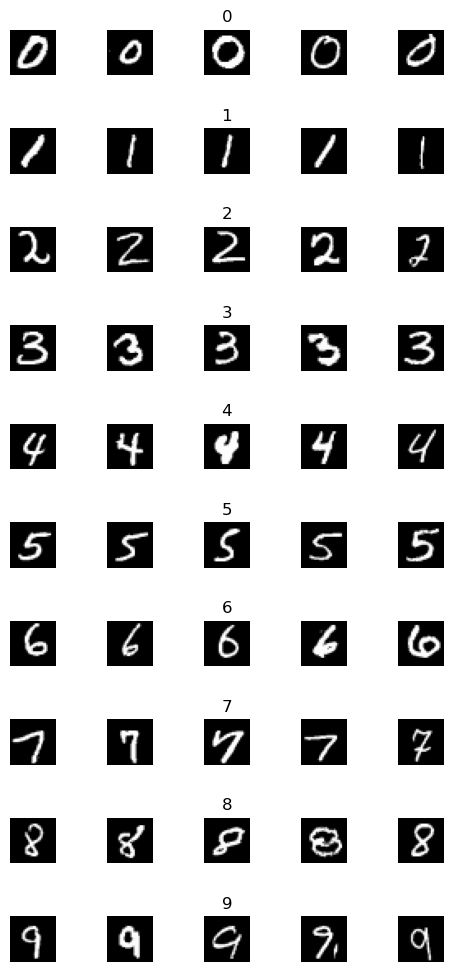

In [156]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


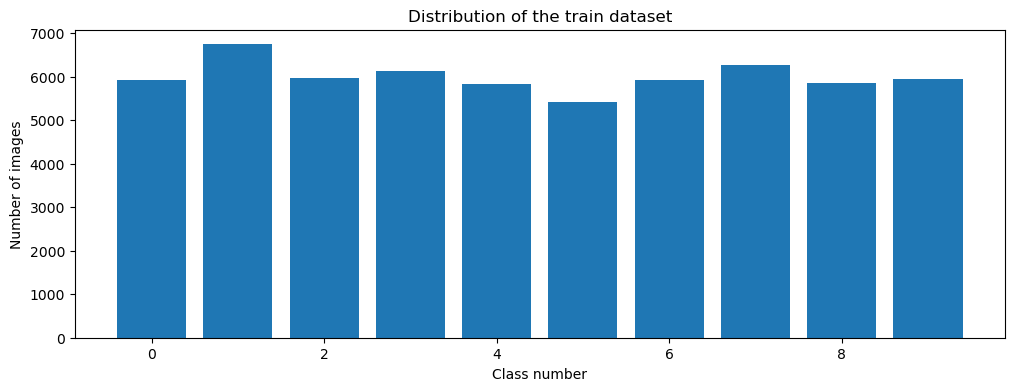

In [157]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [158]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [159]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

In [160]:
#defining the lenet model
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    

In [161]:
model = leNet_model()
model.summary()

/home/anonymous/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 10, 10, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 500)            │       188,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,855 (772.87 KB)

 Trainable params: 197,855 (772.87 KB)

 Non-trainable params: 0 (0.00 B)

In [162]:
history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.7020 - loss: 0.9743 - val_accuracy: 0.9723 - val_loss: 0.0985
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9606 - loss: 0.1347 - val_accuracy: 0.9813 - val_loss: 0.0636
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.9734 - loss: 0.0860 - val_accuracy: 0.9857 - val_loss: 0.0491
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.9809 - loss: 0.0645 - val_accuracy: 0.9872 - val_loss: 0.0461
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.9825 - loss: 0.0575 - val_accuracy: 0.9890 - val_loss: 0.0419
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.9840 - loss: 0.0501 - val_accuracy: 0.9908 - val_loss: 0.0376
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9869 - loss: 0.0414 - val_accuracy: 0.9892 - val_loss: 0.0383
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.9883 - loss: 0.0370 - val_accu

Text(0.5, 0, 'epoch')

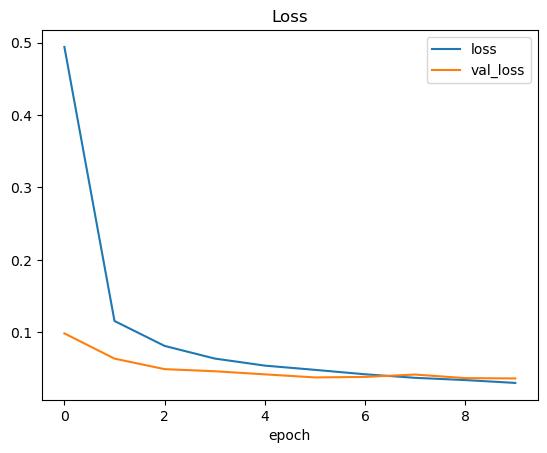

In [163]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss']) 
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

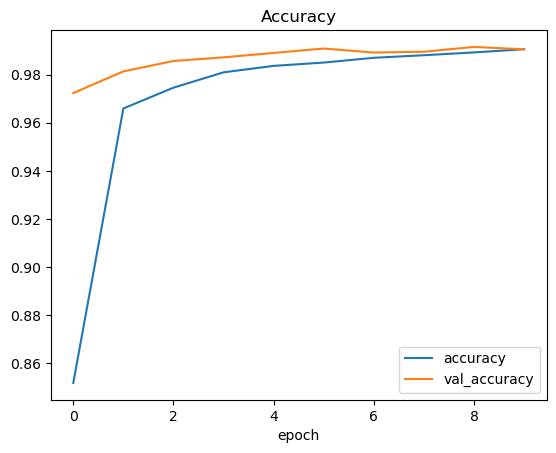

In [164]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy']) 
plt.title('Accuracy')
plt.xlabel('epoch')

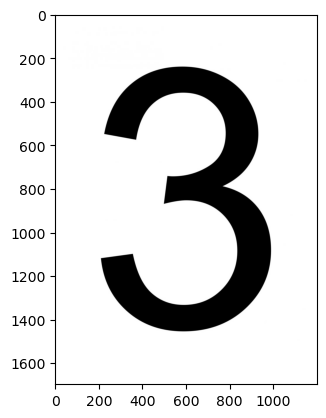

In [165]:
import requests
from PIL import Image
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
response = requests.get(url, stream=True)
img=Image.open(response.raw)
plt.imshow(img)

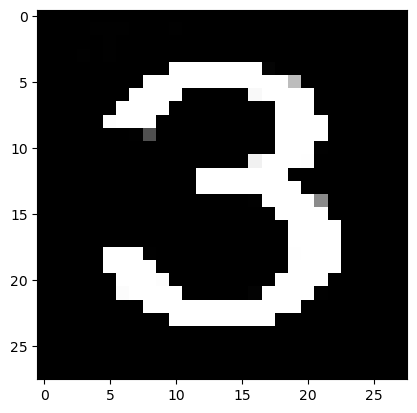

In [166]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img =cv2.bitwise_not(gray_scale)
plt.imshow(img, cmap=plt.get_cmap("gray"))

In [167]:
img = img/255
img = img.reshape(1, 28,28,1)

In [168]:
prediction = np.argmax(model.predict(img), axis=-1)
print("predicted digit:", str(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
predicted digit: [3]


In [169]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.024658838286995888
Test accuracy: 0.9919999837875366


In [176]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
 
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
 
print(visual_layer1.shape)
print(visual_layer2.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


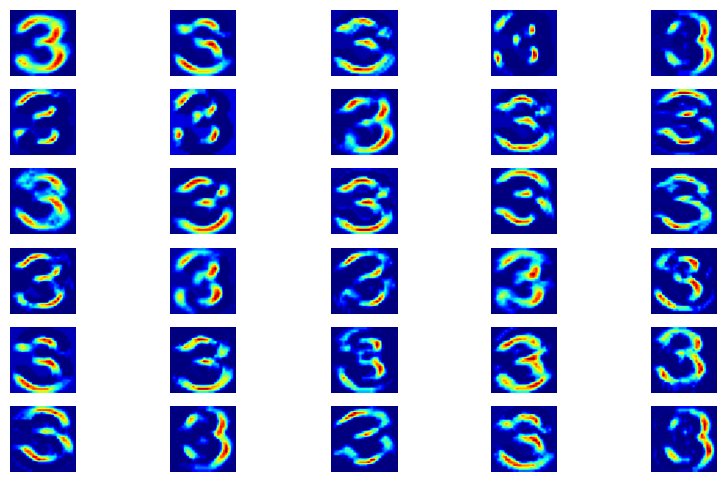

In [179]:
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, : , i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

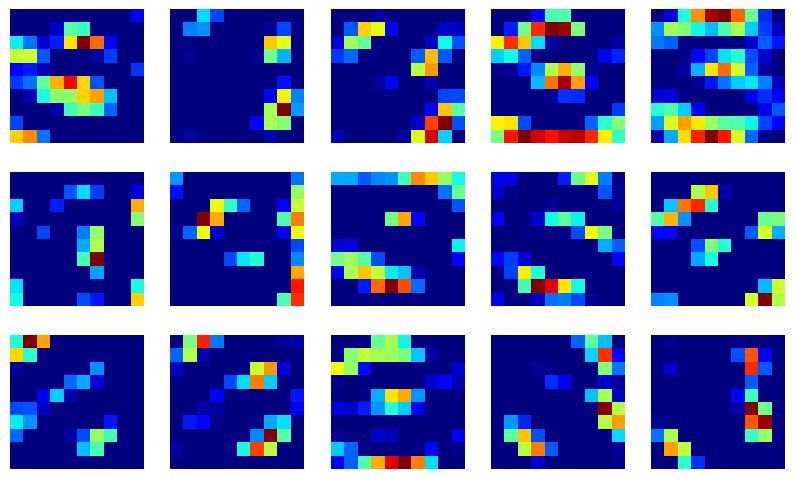

In [181]:
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, : , i], cmap=plt.get_cmap('jet'))
    plt.axis('off')